In [3]:
# Import the packages and check the versions

import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print('Python: {}'.format(sys.version))
print('Python: {}'.format(numpy.__version__))
print('Python: {}'.format(pandas.__version__))
print('Python: {}'.format(matplotlib.__version__))
print('Python: {}'.format(seaborn.__version__))
print('Python: {}'.format(scipy.__version__))
print('Python: {}'.format(sklearn.__version__))

Python: 3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
Python: 1.15.4
Python: 0.23.4
Python: 2.2.3
Python: 0.9.0
Python: 1.1.0
Python: 0.20.1


In [4]:
# Import the packages as easier acronyms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as srs

In [5]:
# Import the necessary csv file

data = pd.read_csv('creditcard.csv')

In [6]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [7]:
print(data.shape)

(284807, 31)


In [8]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [9]:
data = data.sample(frac = 0.15, random_state = 1)

In [10]:
print(data.shape)

(42721, 31)


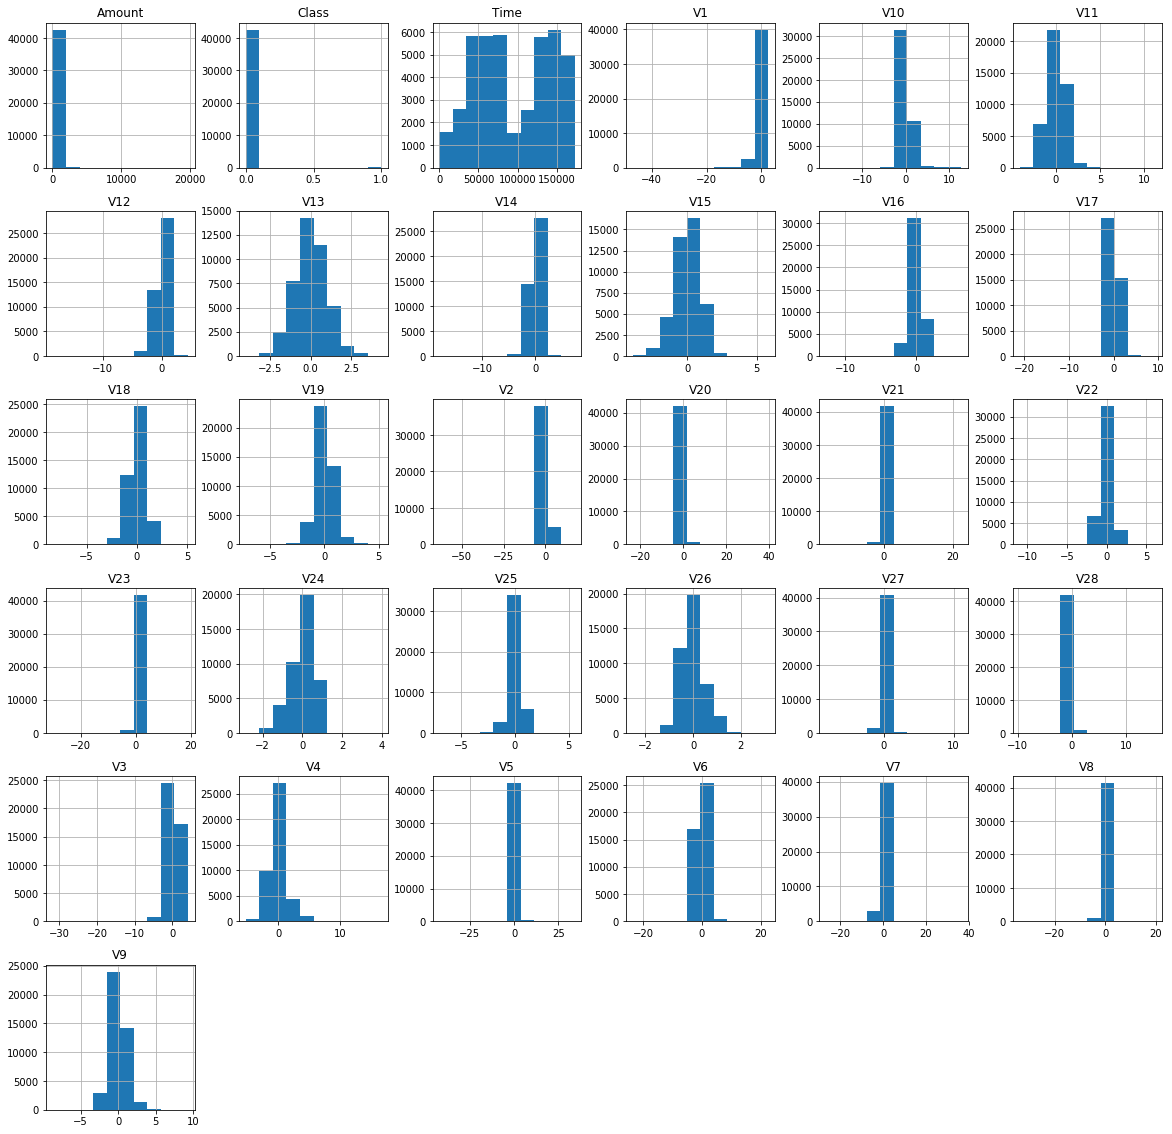

In [11]:
# Plot the histogram of parameter

data.hist(figsize = (20, 20))
plt.show()

In [12]:
# Determine the number of fraud cases in the dataset

fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outliner_fraction = len(fraud) / float(len(valid))
print(outliner_fraction)

print('Fraud Cases: {}' .format(len(fraud)))
print('Valid Cases: {}' .format(len(valid)))

0.0016177435993622808
Fraud Cases: 69
Valid Cases: 42652


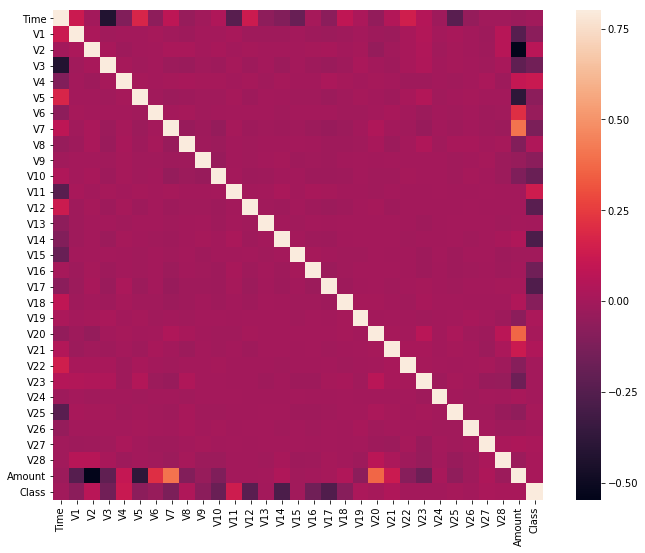

In [13]:
# Correlation matrix -- for checking if there are any strong correlations between different values of our dataset
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

srs.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [14]:
# Get the column names from the DataFrame

columns = data.columns.tolist()

# Filter the columns to remove data we do not need

columns = [c for c in columns if c not in ["Class"]]

# Store the variable that we shall predict based on

target = "Class"

X = data[columns]
Y = data[target]

# Print the shapes of X and y

print(X.shape)
print(Y.shape)

(42721, 30)
(42721,)


In [19]:
# Import all the algorithmic requirements

from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Define a random state

state = 1

# Define the outlier detection methods

classifiers = { "Isolation Forest": IsolationForest(max_samples = len(X), contamination = outliner_fraction, random_state = state),
               "Local Outlier Factor": LocalOutlierFactor(n_neighbors = 20, contamination = outliner_fraction)}


In [21]:
# Fitting the model

n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # Fitting the data and the tag outliers
    
    if clf_name == "Local Outlier Factor":
        
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
        
    else:
        
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    # Reshape the prediction values to 0 for valid, 1 for fraud
    
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    
    print('{} : {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest : 105
0.997542192364411
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42652
           1       0.24      0.25      0.24        69

   micro avg       1.00      1.00      1.00     42721
   macro avg       0.62      0.62      0.62     42721
weighted avg       1.00      1.00      1.00     42721

Local Outlier Factor : 137
0.9967931462278504
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42652
           1       0.01      0.01      0.01        69

   micro avg       1.00      1.00      1.00     42721
   macro avg       0.51      0.51      0.51     42721
weighted avg       1.00      1.00      1.00     42721



In [22]:
# The Isolation Forest gives us an accuracy of 24% for true positives for Fraud which is low, but better than the Local Outlier method that gives an accuracy of 1% for the same. So clearly we see here, that the Isolation Forest is the better of the two in this case